<a href="https://colab.research.google.com/github/vineetbiyani09/NLP/blob/master/NLP_4_J010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [3]:
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [4]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [5]:
sent = preprocess(ex)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

In [6]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [7]:
cp = nltk.RegexpParser(pattern)
print(cp)
cs = cp.parse(sent)
print(cs)

chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<DT>?<JJ>*<NN>'>
(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [8]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


In [9]:
from nltk.chunk import ne_chunk
ne_tree = ne_chunk(pos_tag(word_tokenize(ex)))
print(ne_tree)

(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [10]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [11]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
print(doc)
print(doc.ents)
pprint([(X.text, X.label_) for X in doc.ents])


European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices
(European, Google, $5.1 billion, Wednesday)
[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


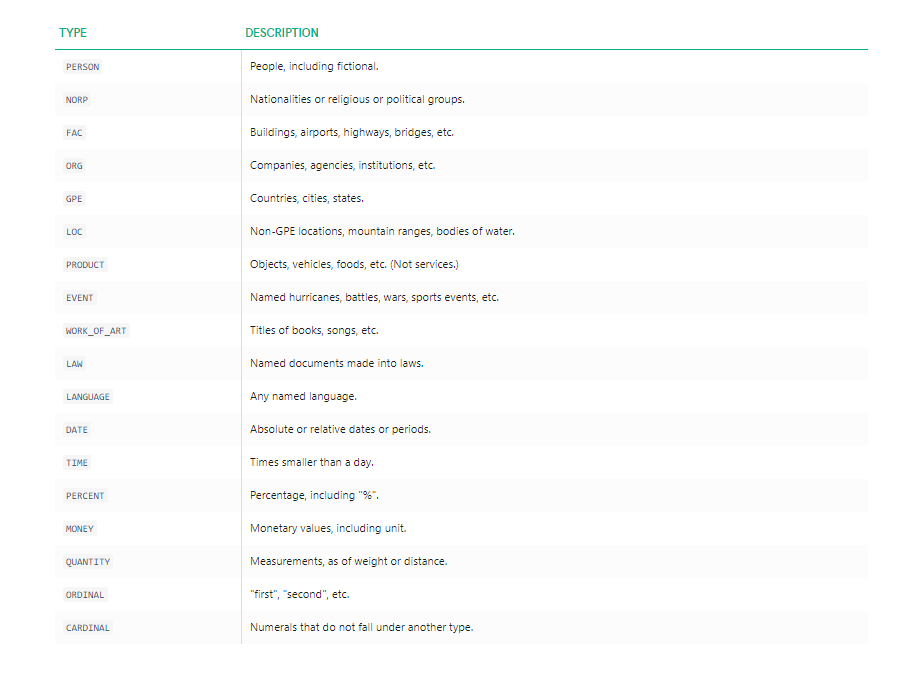

In [12]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


In [13]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
print(ny_bb)
article = nlp(ny_bb)
print(article)
len(article.ents)

     F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is Fired - The New York Times                                                                                                             SectionsSEARCHSkip to contentSkip to site indexPoliticsLog inToday’s PaperPolitics|F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is Firedhttps://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.htmlAdvertisementContinue reading the main storySupported byContinue reading the main storyF.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is FiredPeter Strzok, a top F.B.I. counterintelligence agent who was taken off the special counsel investigation after his disparaging texts about President Trump were uncovered, was fired.Credit...T.J. Kirkpatrick for The New York TimesBy Adam Goldman and Michael S. SchmidtAug. 13, 2018WASHINGTON — Peter Strzok, the F.B.I. senior counterintelligence agent who disparaged President Trump in inflammatory text messages and helped 

154

In [14]:
labels = [x.label_ for x in article.ents]
print(labels)
Counter(labels)

['ORG', 'PERSON', 'ORG', 'ORG', 'ORG', 'PERSON', 'ORG', 'PERSON', 'PERSON', 'ORG', 'ORG', 'ORG', 'PERSON', 'ORG', 'PERSON', 'DATE', 'GPE', 'PERSON', 'ORG', 'PERSON', 'PERSON', 'GPE', 'PERSON', 'DATE', 'PERSON', 'DATE', 'ORG', 'PERSON', 'GPE', 'PERSON', 'DATE', 'ORG', 'DATE', 'PERSON', 'ORG', 'PERSON', 'PERSON', 'DATE', 'PERSON', 'PERSON', 'DATE', 'PERSON', 'DATE', 'PERSON', 'ORG', 'PERSON', 'DATE', 'PERSON', 'ORG', 'PERSON', 'DATE', 'PERSON', 'ORG', 'DATE', 'PERSON', 'ORG', 'PERSON', 'ORG', 'PERSON', 'ORG', 'PERSON', 'PERSON', 'PERSON', 'ORG', 'PERSON', 'ORG', 'PERSON', 'ORG', 'PERSON', 'PERSON', 'ORG', 'ORG', 'PERSON', 'NORP', 'PERSON', 'PERSON', 'PERSON', 'CARDINAL', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'DATE', 'DATE', 'PERSON', 'CARDINAL', 'DATE', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'GPE', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'ORG', 'PERSON', 'PERSON', 'ORG', 'DATE', 'PERSON', 'ORG', 'PERSON', 'LOC', 'PE

Counter({'CARDINAL': 3,
         'DATE': 23,
         'GPE': 9,
         'LOC': 1,
         'NORP': 2,
         'ORDINAL': 1,
         'ORG': 38,
         'PERSON': 77})

In [15]:
items = [x.text for x in article.ents]
print(items)
Counter(items).most_common(3)

['F.B.I.', 'Peter Strzok', 'Texts', 'The New York Times                                                                                                             ', 'inToday', 'Peter Strzok', 'Texts', 'byContinue', 'Peter Strzok', 'Texts', 'FiredPeter Strzok', 'F.B.I.', 'Trump', 'The New York TimesBy Adam', 'Michael S. SchmidtAug', '13', '2018WASHINGTON', 'Peter Strzok', 'F.B.I.', 'Trump', 'Hillary Clinton', 'Russia', 'Strzok', 'Monday', 'Trump', '2016', 'F.B.I.', 'Lisa Page', 'Russia', 'Strzok', '20 years', 'F.B.I.', 'the early months', 'Strzok', 'F.B.I.', 'Trump', 'Strzok', 'last summer', 'Robert S. Mueller III', 'Strzok', 'Monday', 'Trump', 'June', 'Strzok', 'F.B.I.', 'Hillary Clinton', '2016', 'Strzok', 'Office of Professional Responsibility', 'Strzok', '60 days', 'Strzok', 'House', 'July', 'Strzok', 'F.B.I.', 'David Bowdich', 'the Office of Professional Responsibility', 'Strzok', 'F.B.I.', 'Strzok', 'Strzok', 'Trump', 'F.B.I.', 'Bowdich', 'F.B.I.', 'Christopher A. Wray', 'Aitan 

[('Strzok', 29), ('F.B.I.', 19), ('Trump', 13)]

In [16]:
# for i in article.sents:
#   print(i)
sentences = [x for x in article.sents]
print(sentences[10])

Along with writing the texts, Mr. Strzok was accused of sending a highly sensitive search warrant to his personal email account.


In [17]:
displacy.render(nlp(str(sentences[25])), jupyter=True, style='ent')

/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [18]:
displacy.render(nlp(str(sentences[25])), style='dep', jupyter = True, options = {'distance': 120})

In [19]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences)) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('    ', 'SPACE', '    '),
 ('F.B.I.', 'PROPN', 'F.B.I.'),
 ('Agent', 'PROPN', 'Agent'),
 ('Peter', 'PROPN', 'Peter'),
 ('Strzok', 'PROPN', 'Strzok'),
 ('Criticized', 'VERB', 'criticize'),
 ('Trump', 'PROPN', 'Trump'),
 ('Texts', 'PROPN', 'Texts'),
 ('Fired', 'VERB', 'fire'),
 ('New', 'PROPN', 'New'),
 ('York', 'PROPN', 'York'),
 ('Times', 'PROPN', 'Times'),
 ('                                                                                                            ',
  'SPACE',
  '                                                                                                            '),
 ('SectionsSEARCHSkip', 'PROPN', 'SectionsSEARCHSkip'),
 ('contentSkip', 'PROPN', 'contentSkip'),
 ('site', 'VERB', 'site'),
 ('indexPoliticsLog', 'NOUN', 'indexpoliticslog'),
 ('inToday', 'NOUN', 'intoday'),
 ('PaperPolitics|F.B.I.', 'PROPN', 'PaperPolitics|F.B.I.'),
 ('Agent', 'PROPN', 'Agent'),
 ('Peter', 'PROPN', 'Peter'),
 ('Strzok', 'PROPN', 'Strzok'),
 ('Criticized', 'VERB', 'criticize'),

In [20]:
dict([(str(x), x.label_) for x in nlp(str(sentences[20])).ents])

{'F.B.I.': 'ORG', 'Strzok': 'PERSON'}

In [21]:
print([(x, x.ent_iob_, x.ent_type_)] for x in sentences[20])

<generator object <genexpr> at 0x7ffaed660050>
